In [ ]:
import ace_lensing
import numpy as np
import matplotlib.pyplot as plt

LOADING TRANING DATA

In [2]:
df = ace_lensing.load_training_data()

In [146]:
matching_rows = df[df['z'].round(2) == 1.5]

Received input parameters: Om=0.2121, h=0.7454550000000001, w=-1.0818, s8=0.8697, z=1.0009
Received input parameters: Om=0.3838, h=0.7151519999999999, w=-1.1061, s8=0.7242, z=1.0046


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_9661/2191701392.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_test = pdf_test / np.trapz(pdf_test, mu_test)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_9661/2191701392.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_test2 = pdf_test2 / np.trapz(pdf_test2, mu_test2)


(0.001, np.float64(29.121164028009247))

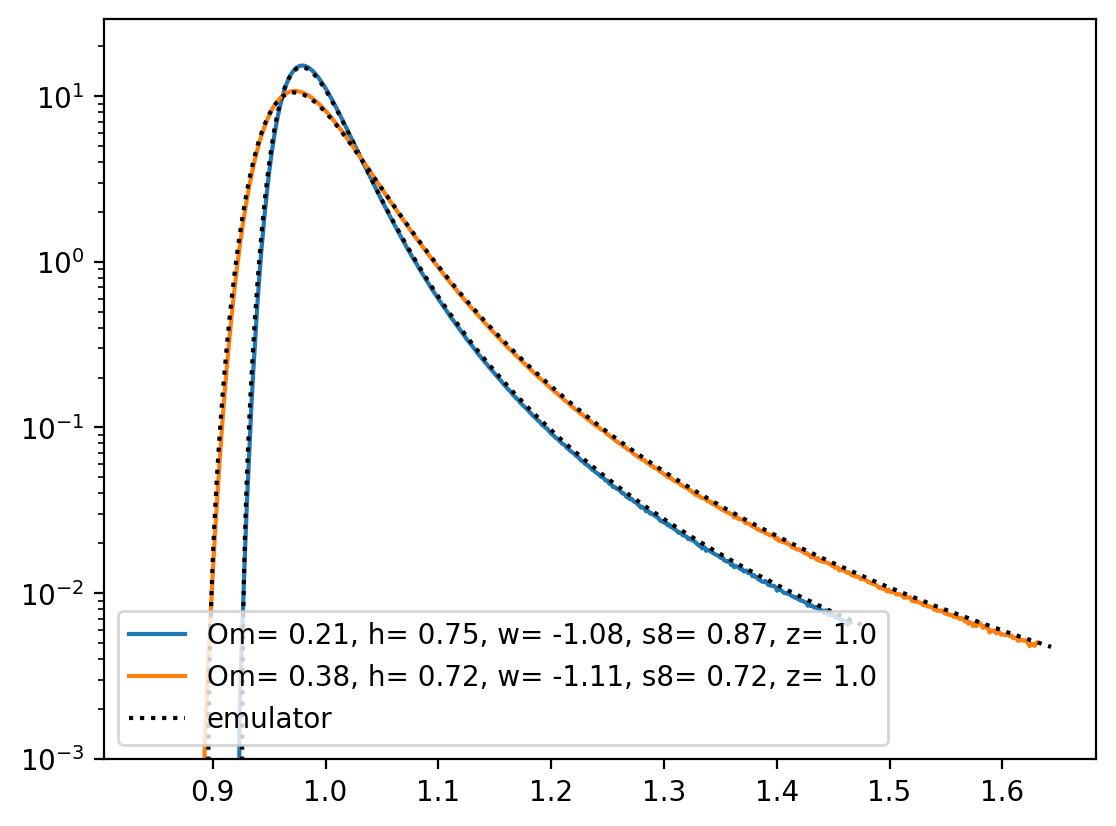

In [ ]:
parameter_names = ["Om",	"h",	"w",	"s8",   "z"]

sample = 361
params = df[parameter_names].to_numpy()[sample]
mu_test = df["mu_vec"][sample] * np.sqrt(df["var"][sample]) +df["mean"][sample]
pdf_test = df["pdf"][sample] / np.sqrt(df["var"][sample])
pdf_test = pdf_test / np.trapz(pdf_test, mu_test)
mu, pdf = ace_lensing.predict_pdf(*params)
label = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params))
plt.plot(mu_test, pdf_test, label=label)
plt.plot(mu, pdf, color="black", ls=":")

sample2 = 989
params2 = df[parameter_names].to_numpy()[sample2]
mu_test2 = df["mu_vec"][sample2] * np.sqrt(df["var"][sample2]) +df["mean"][sample2]
pdf_test2 = df["pdf"][sample2] / np.sqrt(df["var"][sample2])
pdf_test2 = pdf_test2 / np.trapz(pdf_test2, mu_test2)
mu2, pdf2 = ace_lensing.predict_pdf(*params2)
label2 = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params2))
plt.plot(mu_test2, pdf_test2, label=label2)
plt.plot(mu2, pdf2, label="emulator", color="black", ls=":")


plt.ylabel("PDF")
plt.xlabel(r'$\mu$')
plt.yscale("log")
plt.legend()
plt.ylim(1e-3)



Received input parameters: Om=0.3717, h=0.6545449999999999, w=-1.2212, s8=0.7848, z=1.5021
Received input parameters: Om=0.2566, h=0.618182, w=-0.7909, s8=0.801, z=1.503
Received input parameters: Om=0.32, h=0.63, w=-1, s8=0.79, z=1.5


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_9661/1851505920.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_test = pdf_test / np.trapz(pdf_test, mu_test)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_9661/1851505920.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_test2 = pdf_test2 / np.trapz(pdf_test2, mu_test2)


(0.001, np.float64(19.73111784832049))

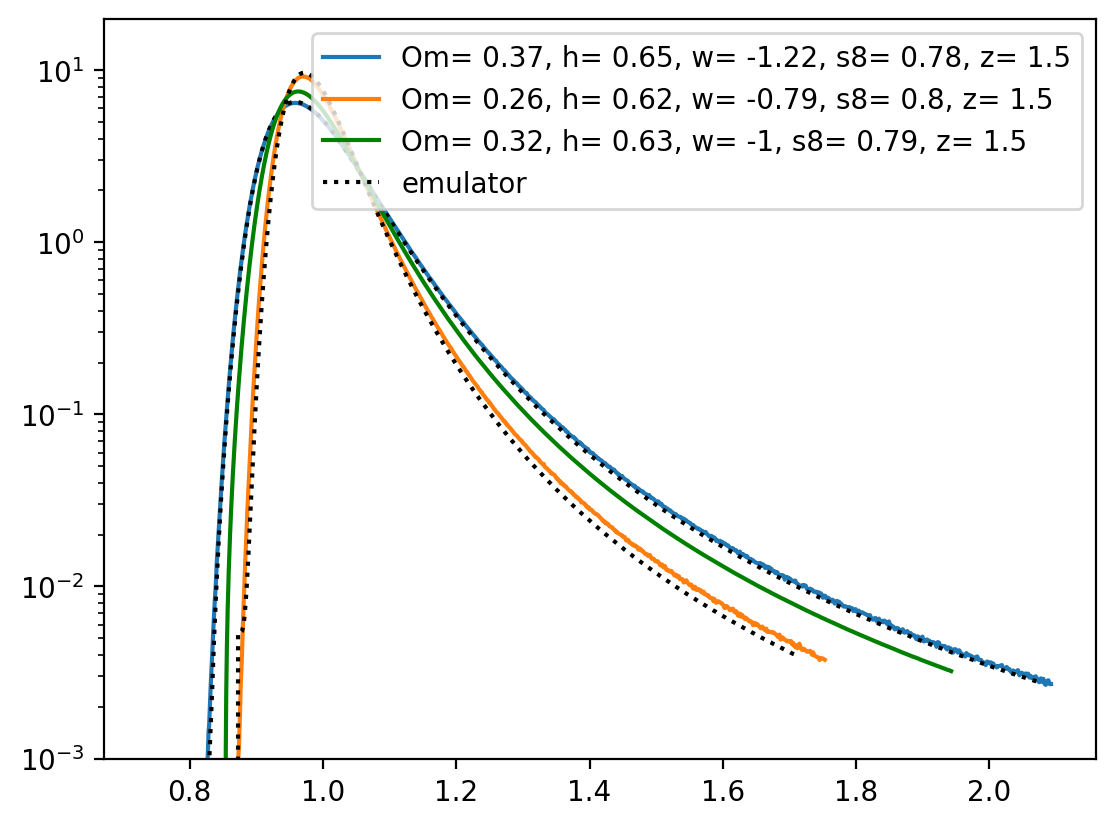

In [ ]:
parameter_names = ["Om",	"h",	"w",	"s8",   "z"]

sample = 306
params = df[parameter_names].to_numpy()[sample]
mu_test = df["mu_vec"][sample] * np.sqrt(df["var"][sample]) +df["mean"][sample]
pdf_test = df["pdf"][sample] / np.sqrt(df["var"][sample])
pdf_test = pdf_test / np.trapz(pdf_test, mu_test)
mu, pdf = ace_lensing.predict_pdf(*params)
label = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params))
plt.plot(mu_test, pdf_test, label=label)
plt.plot(mu, pdf, color="black", ls=":")

sample2 = 323
params2 = df[parameter_names].to_numpy()[sample2]
mu_test2 = df["mu_vec"][sample2] * np.sqrt(df["var"][sample2]) +df["mean"][sample2]
pdf_test2 = df["pdf"][sample2] / np.sqrt(df["var"][sample2])
pdf_test2 = pdf_test2 / np.trapz(pdf_test2, mu_test2)
mu2, pdf2 = ace_lensing.predict_pdf(*params2)
label2 = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params2))
plt.plot(mu_test2, pdf_test2, label=label2)



params3 = [0.32, 0.63, -1, 0.79, 1.5]
label3 = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params3))
mu3, pdf3 = ace_lensing.predict_pdf(*params3)
plt.plot(mu3, pdf3, label=label3, color="green", ls="solid",)
plt.plot(mu2, pdf2, label="emulator", color="black", ls=":")

plt.ylabel("PDF")
plt.xlabel(r'$\mu$')
plt.yscale("log")
plt.legend()
plt.ylim(1e-3)

In [124]:
def sigma_lens(z, sigma_8, Omega_m0):
    numerator = 0.0004 - 0.00176 * sigma_8 + (-0.035 + sigma_8 * Omega_m0 + 0.0453 * sigma_8) * z
    denominator = (2.19 + sigma_8**2) * Omega_m0 * z + 3.19 * np.exp(0.365 / (0.193 + z))
    return numerator / denominator

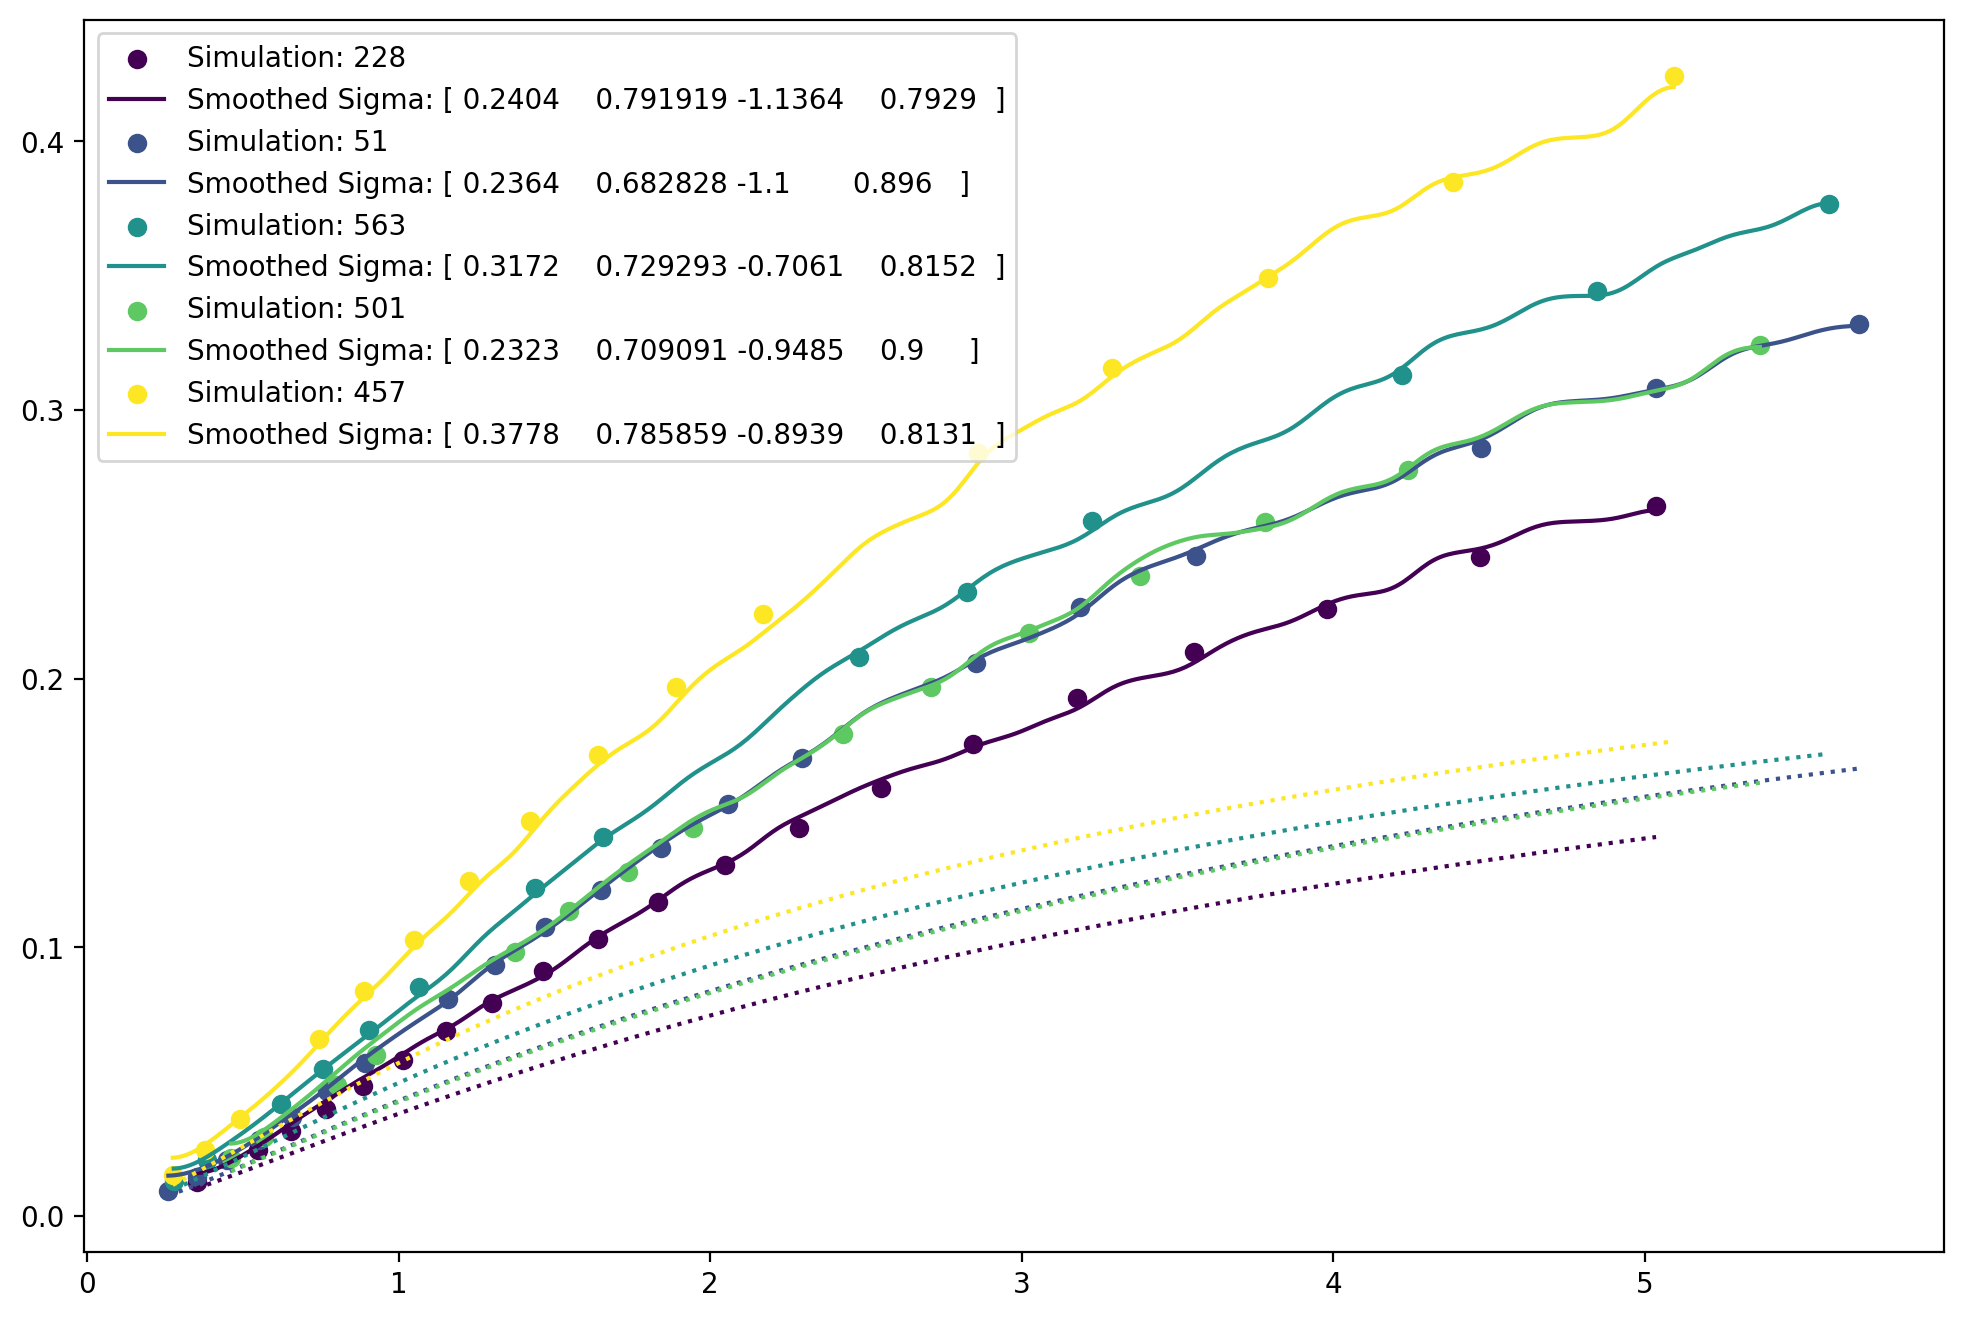

In [125]:
import random
from scipy.ndimage import gaussian_filter1d
%config InlineBackend.figure_format ='retina'
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

colors = plt.cm.viridis(np.linspace(0, 1, 5))
plt.figure(figsize=(12, 8))

random.seed(42)
for idx, i in enumerate(random.sample(range(1101), 5)):

    c0 = df.merge(df[['Om', 'h', 'w', 's8']].iloc[[i]], on=['Om', 'h', 'w', 's8'])
    color = colors[idx]  # Select color for this iteration
    plt.scatter(c0['z'], np.sqrt(c0['var']), color=color, label=f'Simulation: {i}')

    redshifts = np.linspace(c0['z'].min(), c0['z'].max(), 500)

    cosmo = c0[['Om', 'h', 'w', 's8']].iloc[0].to_numpy()

    sigma = np.array([])
    sigma_old = np.array([])
    for red in redshifts:
        cosmo0=cosmo
        cosmo0 = np.append(cosmo0,red)
        sigma = np.append(sigma, ace_lensing.predict_sigma(*cosmo0, verbose=False))
        sigma_smoothed = gaussian_filter1d(sigma, sigma=7)
        sigma_old = np.append(sigma_old, sigma_lens(red, cosmo[-1], cosmo[0]))

    #plt.plot(redshifts, sigma, label=f'Original Sigma {i}', alpha=0.5, color=color)
    plt.plot(redshifts, sigma_smoothed, label=f'Smoothed Sigma: {cosmo}', color=color)
    plt.plot(redshifts, sigma_old, linestyle=':', color=color)
plt.legend()
#plt.xscale('log')
plt.show()

In [126]:
import pandas as pd


def read_dat(name, skip_rows=1):
    """
    extracts columns of the .dat or .csv files.


        INPUT:
    name (str):         Directory of the file: /dir/file
    skip_rows (int):    Number of rows to skip, set to 1

        OUTPUT:
    float array: 1st column of file
    float array: 2nd column of file
    """

    df = pd.read_csv(name, delim_whitespace=True, skiprows=skip_rows)

    # Extract the first column into a numpy array
    first_column = df.iloc[:, 0].values.astype(float)

    # Extract the second columns into a numpy array
    second_column = df.iloc[:, 1].values.astype(float)

    return first_column, second_column


def extract_parameters(name):
    """
    extracts header of .dat file. 
    works with the convergence PDF .dat files Valerio created with TurboGL
    returns redshift and cosmological parameters of the PDF.
    

        INPUT:
    name (str): Directory of the file: /dir/file

        OUTPUT: 
    float:              Redshift
    float numpy array:  Containing 4 Elements
        Omega Matter Today, 
        Little h (Hubble Parameter), 
        Dark Energy Equation of State, 
        Sigma 8 
    """
    with open(name, 'r') as file:
        first_line = file.readline().strip()  # Read the first line and remove leading/trailing whitespace
    # First line of the files are
    # kappa	PDF at z=0.5 - {Om=0.305051, h=0.751515, w=-1.23939, sigma8=0.857576}
    # Split the first line by '-' to get the second part containing the parameters
    z = float(first_line.split(' ')[2].split('=')[1])

    # Split the parameters by commas and extract the values
    parameters = np.empty(4)
    for i in range(4):
        parameters[i] = first_line.split(' ')[4+i].split('=')[1].split(',')[0].replace('}', '')


    return z, parameters

In [127]:
for z in [1,2,3,5]:
    plt.figure(figsize=(8,6))
    cosmology = [0.301, 0.682, -1, 0.798, z]
    mu_pred, pdf_pred = ace_lensing.predict_pdf(*cosmology)
    mu_test, pdf_test = read_dat(f'/home/tunc/Downloads/log_mu_full_NB_uhr_2048_pdf_z{z}.txt', skip_rows=0)
    plt.plot(mu_test, pdf_test, label = 'test', linestyle='--')
    plt.plot(mu_pred, pdf_pred, label = 'prediction')
    plt.yscale("log")
    plt.xlim(0,4)
    plt.ylim(1e-4)
    plt.legend()
    plt.title(f'Redshift = {z}')

Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=1


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_9661/1695452848.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(name, delim_whitespace=True, skiprows=skip_rows)


FileNotFoundError: [Errno 2] No such file or directory: '/home/tunc/Downloads/log_mu_full_NB_uhr_2048_pdf_z1.txt'

<Figure size 800x600 with 0 Axes>